In [6]:
import sys

import matplotlib.pyplot as plt

#import cv2
import cv2
from deepfly.GUI.os_util import *
from mpl_toolkits.mplot3d import Axes3D
# from mpl_toolkits.mplot3d import Axes3D
from drosoph3D.GUI.CameraNetwork import CameraNetwork
import drosoph3D.GUI.skeleton as skeleton
import pickle
import glob
from drosoph3D.GUI.plot_util import *
%load_ext autoreload
%autoreload 2
plt.style.use('dark_background')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
#image_folder = os.path.abspath('../data/test/')
image_folder = '/data/paper/180920_MDN_CsCh/Fly9/001_SG1/behData/images'
image_folder = os.path.abspath(image_folder)
print(image_folder)
calib = read_calib(image_folder)
num_cameras = skeleton.num_cameras

cid2cidread, cidread2cid = read_camera_order(image_folder)
camNet = CameraNetwork(image_folder=image_folder, num_images=None, cam_id_list=np.arange(num_cameras), calibration=calib, cid2cidread=cid2cidread)

d = pickle.load(open(glob.glob(os.path.join(image_folder, 'pose_result*.pkl'))[0], 'rb'))
for cam in camNet:
    cam.points2d = d["points2d"][cam.cam_id, :]
camNet.triangulate()
pts3d = camNet.points3d_m

/data/paper/180920_MDN_CsCh/Fly9/001_SG1/behData/images
Loading predictions ['/data/paper/180920_MDN_CsCh/Fly9/001_SG1/behData/images/preds_-data-paper-180920_MDN_CsCh-Fly9-001_SG1-behData-images.pkl']
Loading heatmaps ['/data/paper/180920_MDN_CsCh/Fly9/001_SG1/behData/images/heatmap_-data-paper-180920_MDN_CsCh-Fly9-001_SG1-behData-images.pkl']
Heatmap shape: (8, 900, 19, 64, 128)


# With Z-ordering

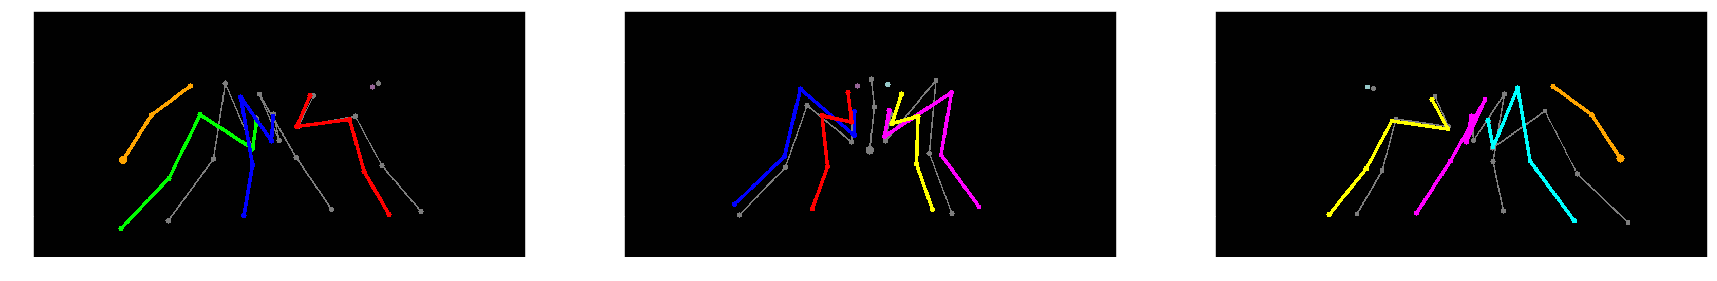

In [11]:
%matplotlib inline
img_id = 0
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(30,30))
for cam_id, ax in zip([1,3,5], [ax1,ax2,ax3]):
    draw_joints = range(skeleton.num_joints)
    pt = camNet.points3d_m[img_id, :]
    for j in range(skeleton.num_joints):
        if skeleton.is_stripe(j) and skeleton.is_joint_visible_left(j):
            pt[j] = (pt[j] + pt[j+(skeleton.num_joints // 2)]) / 2
            pt[j + skeleton.num_joints // 2] = pt[j]
    pts2d = camNet[cam_id].project(pt)

    thickness = [5]*skeleton.num_limbs
    colors_tmp = skeleton.colors.copy()
    for l in range(skeleton.num_limbs):
        if not skeleton.camera_see_limb(camNet[cam_id].cam_id, l):
            thickness[l] = 2
            colors_tmp[l] = (125,125,125)
    
    
    zorder = skeleton.get_zorder(cam_id)
    
    
    ax.imshow(camNet[cam_id].plot_2d(img=np.ones((480,960,3), dtype=np.uint8), img_id=img_id, pts=pts2d, flip_points=False, colors=colors_tmp, thickness=thickness, draw_joints=draw_joints, zorder=zorder))

# 5 Row video

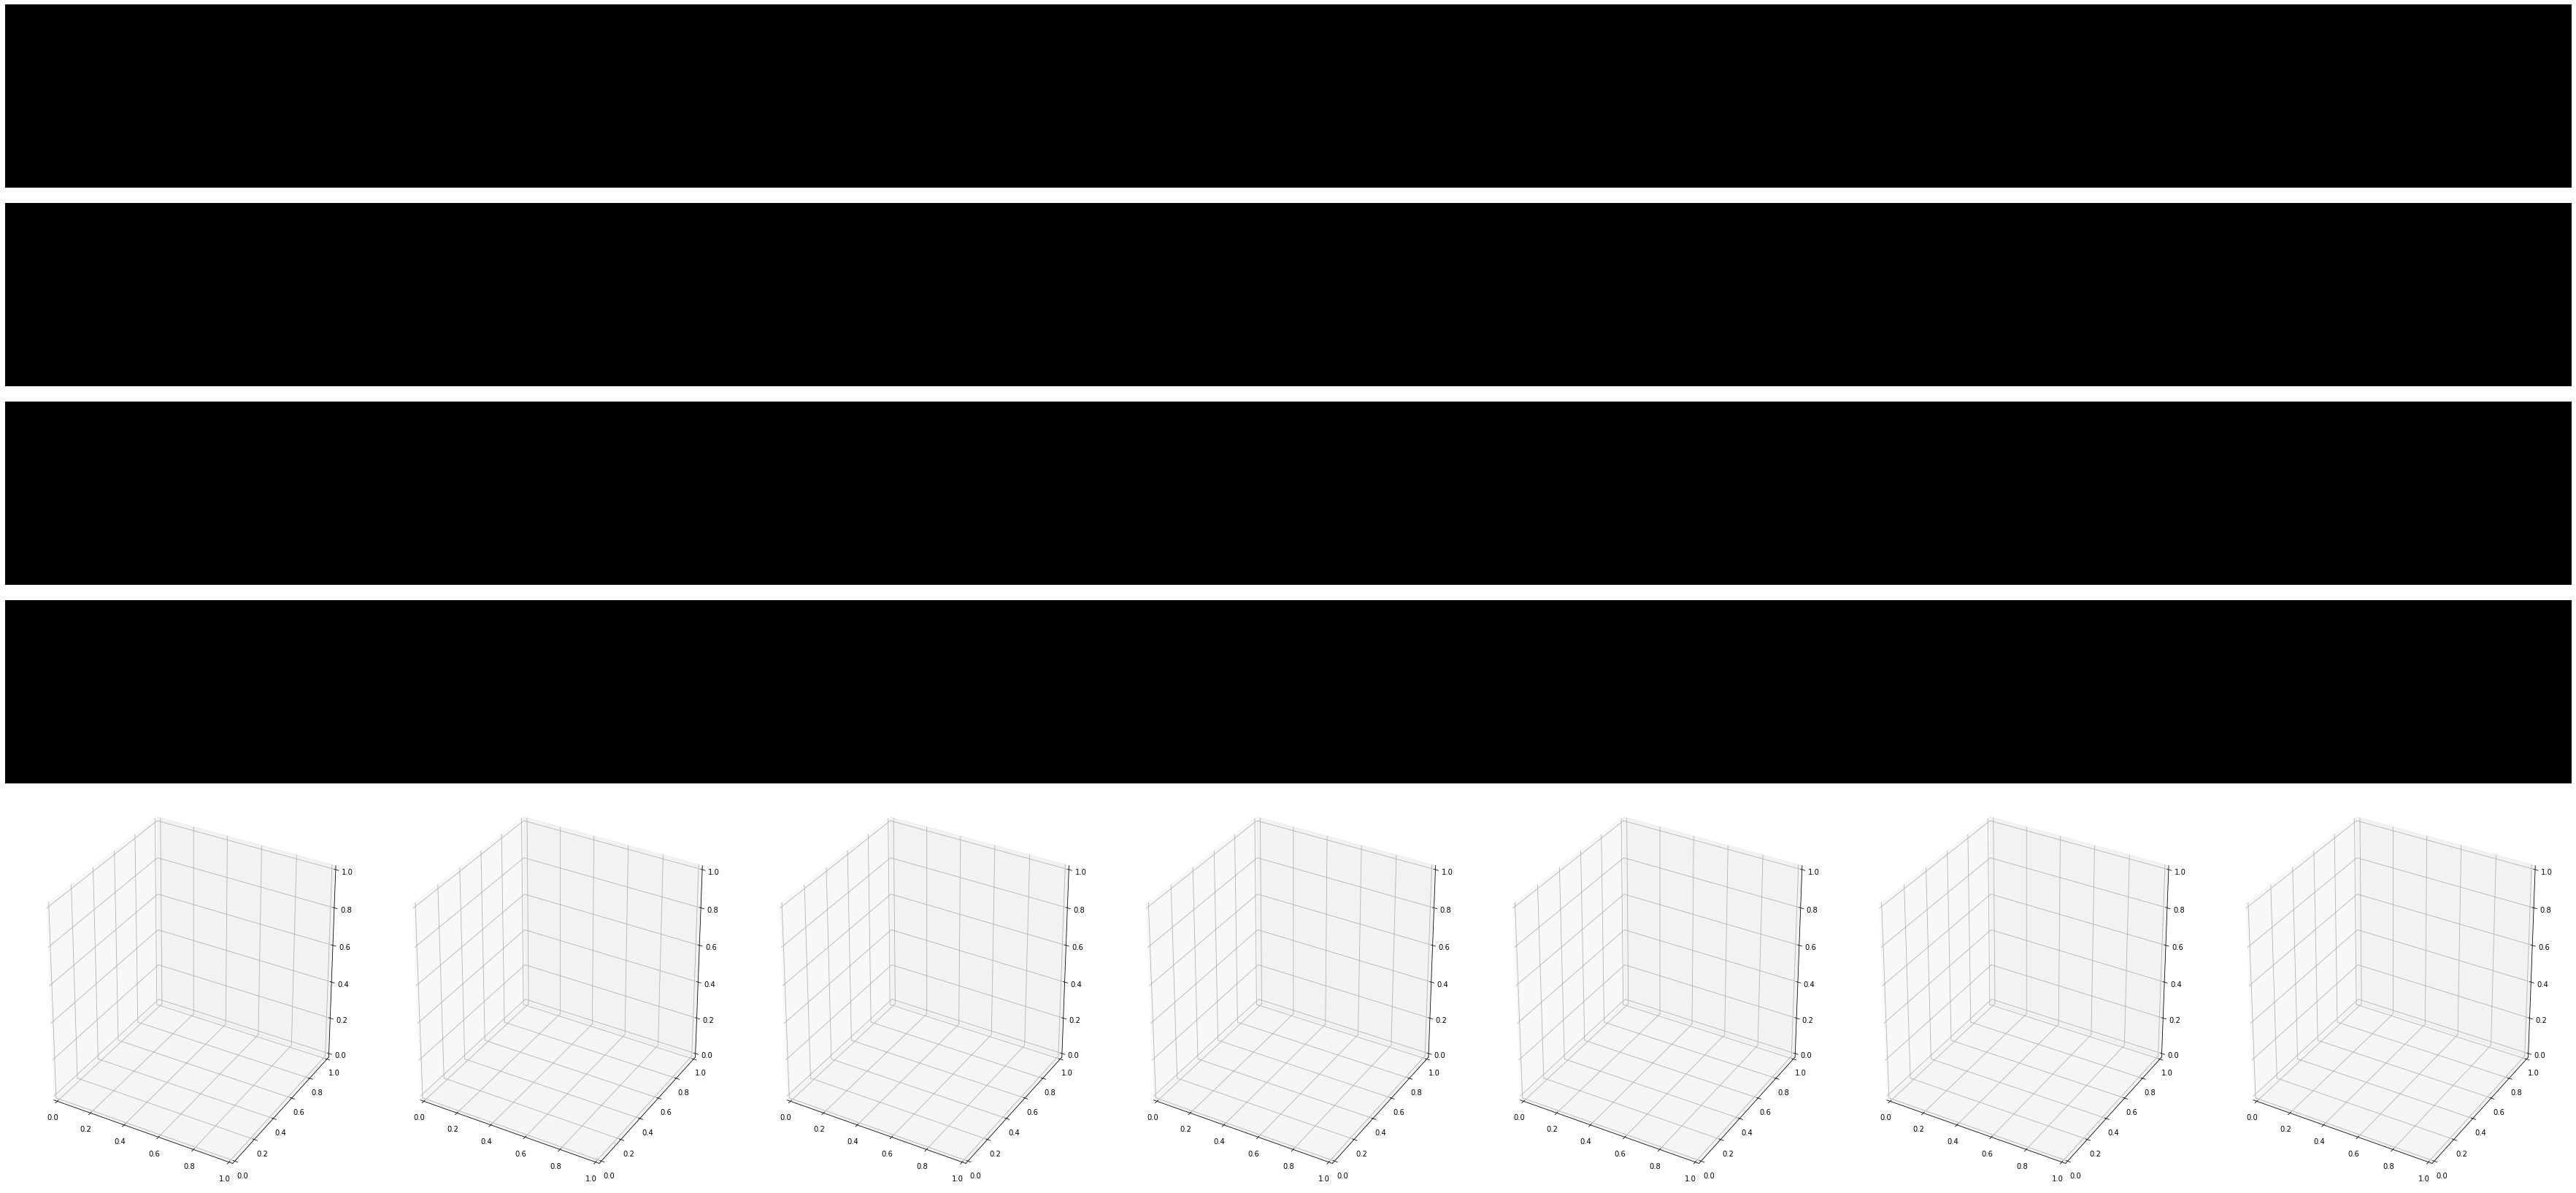

In [13]:
plt.style.use('default')
%matplotlib inline
pts3d_filter = pts3d.copy()

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from drosoph3D.GUI.plot_util import plot_drosophila_3d
from drosoph3D.GUI.plot_util import normalize_pose_3d


folder = '/home/user/Desktop/tmp/mdn_row5/'
assert(os.path.isdir(folder))
num_rows, num_cols = 6, 7
fig = plt.figure(figsize=(num_cols*9,num_rows*5))

gs1 = gridspec.GridSpec(num_rows, num_cols)
gs1.update(wspace=0, hspace=0) # set the spacing between axes. 

plt_list = []

pts_t = pts3d_filter.copy()
tmp = pts_t[:,:,1].copy()
pts_t[:,:,1] = pts_t[:,:,2].copy()
pts_t[:,:,2] = tmp
pts_t[:,:,2] *=-1 
pts_t[:,:,1] *=-1 

pts_t = normalize_pose_3d(pts_t, normalize_median=True)

for i in range(num_rows*num_cols):
    r = int(i / num_cols)
    c = i % num_cols
    if r==4:
        ax1 = plt.subplot(gs1[r:, c] , projection='3d')
    elif r<4:
        ax1 = plt.subplot(gs1[r,c])
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')
        plt.axis('off')
    if r==4:
        plt_list.append(ax1)
    elif r<4:
        plt_list.append(ax1.imshow(np.zeros((480,960,3), dtype=np.uint8)))

0
0 7
1 8
2 9
Trying to read heatmap from camera 2 point 16
Trying to read heatmap from camera 2 point 17
Trying to read heatmap from camera 2 point 18
3 10
Trying to read heatmap from camera 3 point 0
Trying to read heatmap from camera 3 point 1
Trying to read heatmap from camera 3 point 5
Trying to read heatmap from camera 3 point 6
Trying to read heatmap from camera 3 point 10
Trying to read heatmap from camera 3 point 11
Trying to read heatmap from camera 3 point 12
Trying to read heatmap from camera 3 point 13
Trying to read heatmap from camera 3 point 14
Trying to read heatmap from camera 3 point 16
Trying to read heatmap from camera 3 point 17
Trying to read heatmap from camera 3 point 18
Trying to read heatmap from camera 3 point 19
Trying to read heatmap from camera 3 point 20
Trying to read heatmap from camera 3 point 24
Trying to read heatmap from camera 3 point 25
Trying to read heatmap from camera 3 point 29
Trying to read heatmap from camera 3 point 30
Trying to read heat

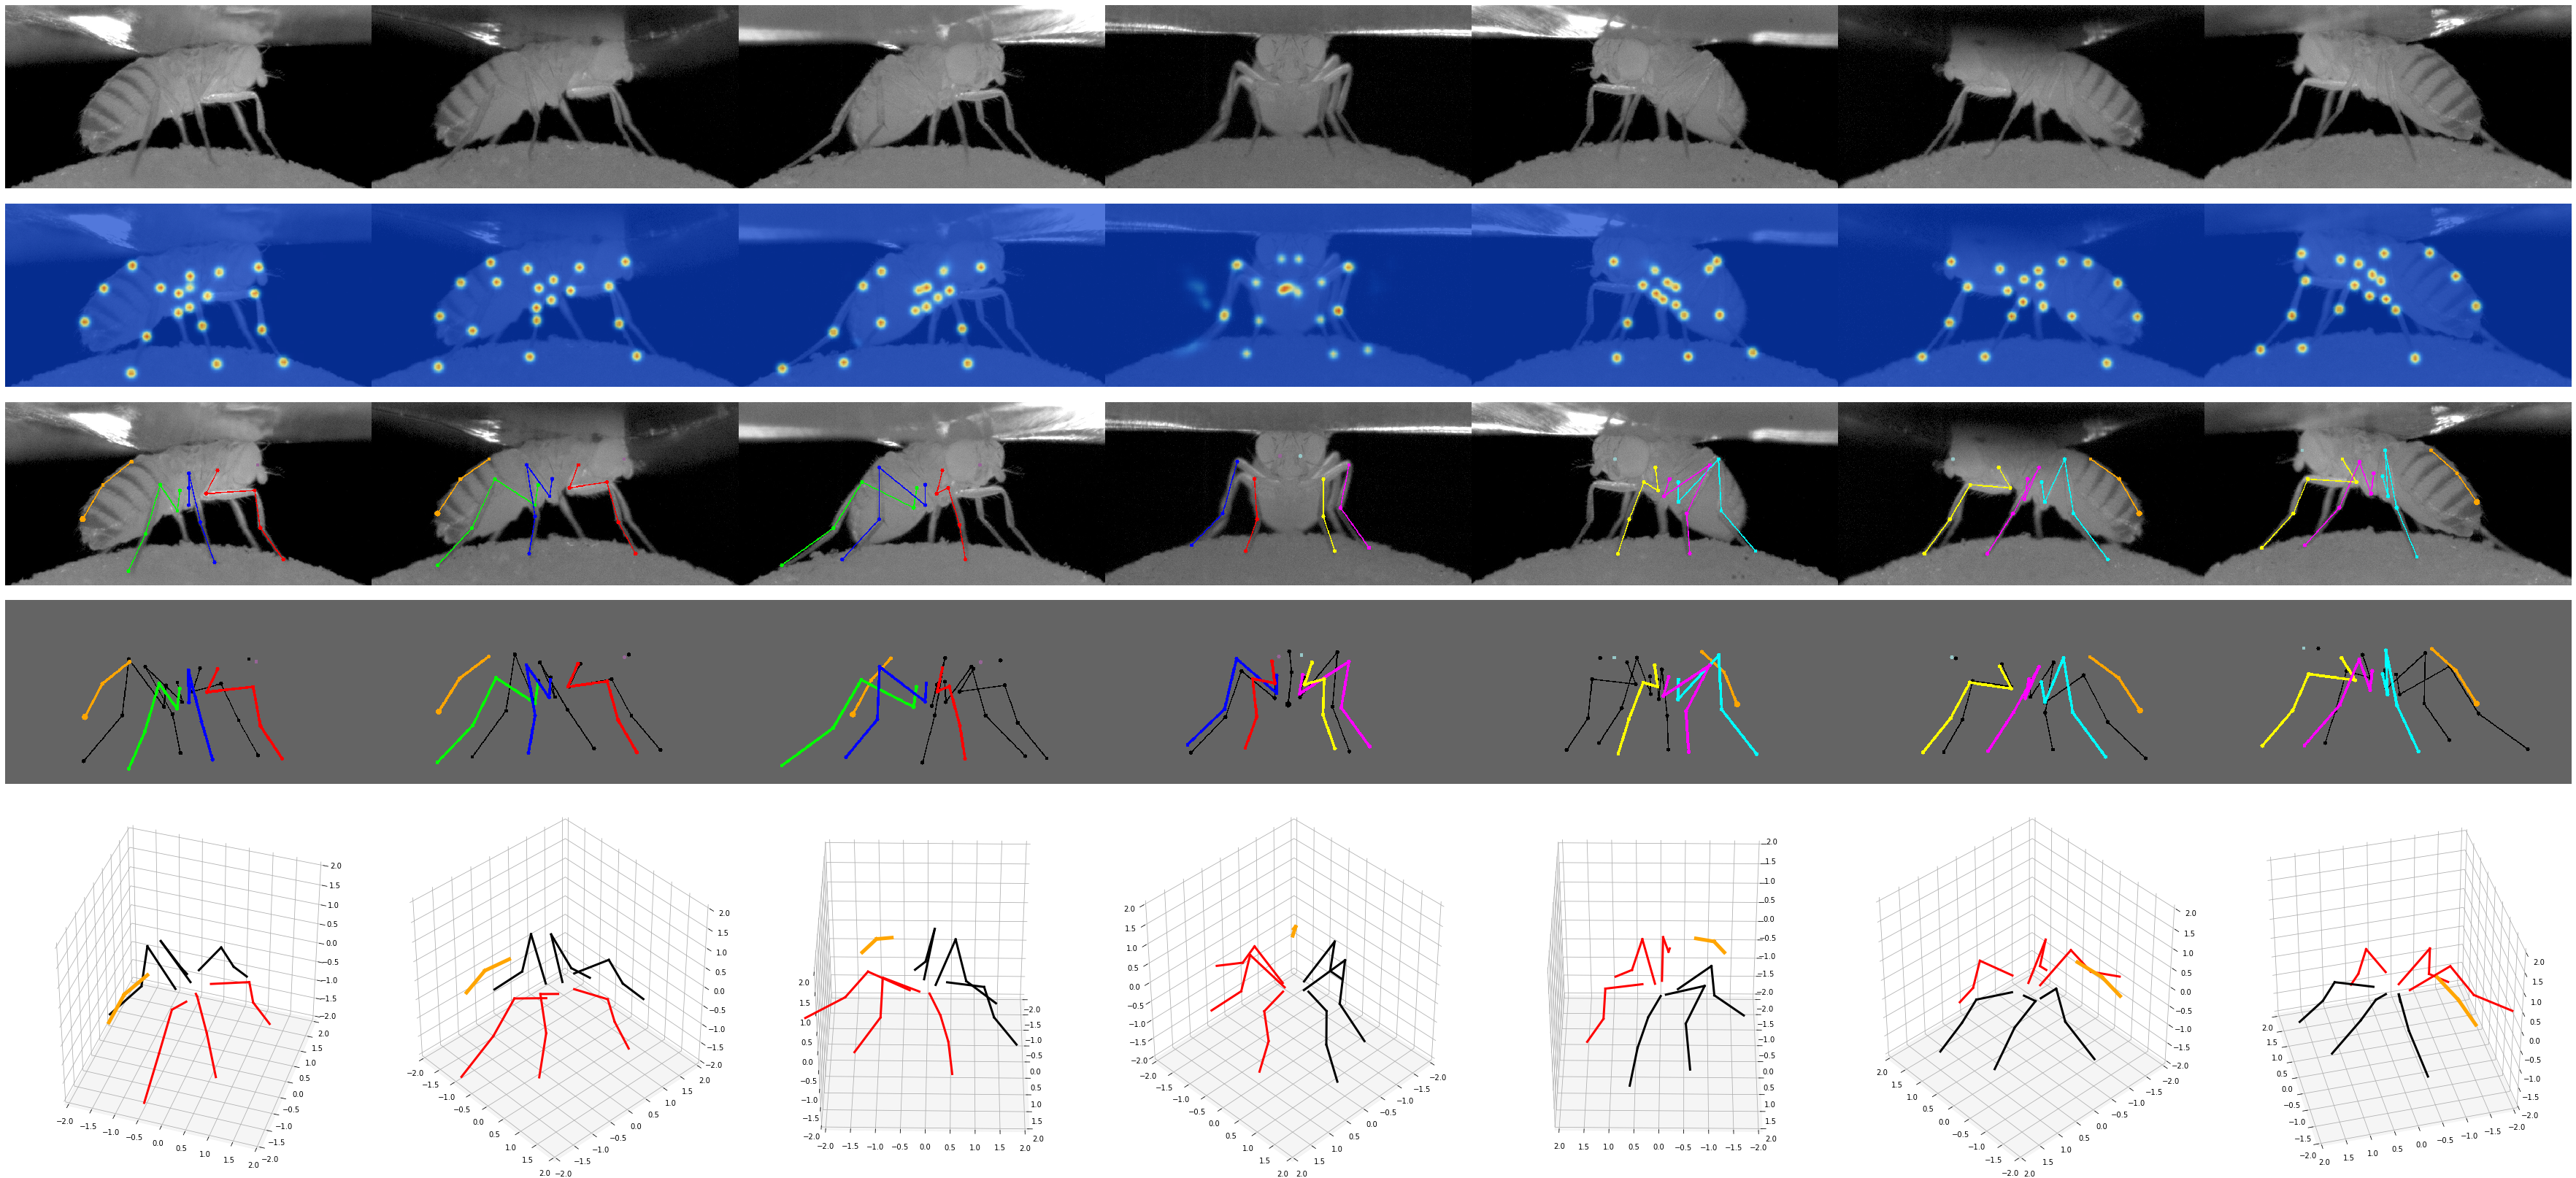

In [26]:
from OneEuroFilter import *
plt.style.use('default')
%matplotlib inline
pts3d_filter = filter_batch(pts3d)

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from drosoph3D.GUI.plot_util import plot_drosophila_3d
from drosoph3D.GUI.plot_util import normalize_pose_3d


folder = '/home/user/Desktop/tmp/mdn_row5/'
assert(os.path.isdir(folder))
num_rows, num_cols = 6, 7
fig = plt.figure(figsize=(num_cols*9,num_rows*5))

gs1 = gridspec.GridSpec(num_rows, num_cols)
gs1.update(wspace=0, hspace=0) # set the spacing between axes. 

plt_list = []

pts_t = pts3d_filter.copy()
tmp = pts_t[:,:,1].copy()
pts_t[:,:,1] = pts_t[:,:,2].copy()
pts_t[:,:,2] = tmp
pts_t[:,:,2] *=-1 
pts_t[:,:,1] *=-1 

pts_t = normalize_pose_3d(pts_t, normalize_median=True)

for i in range(num_rows*num_cols):
    r = int(i / num_cols)
    c = i % num_cols
    if r==4:
        ax1 = plt.subplot(gs1[r:, c] , projection='3d')
    elif r<4:
        ax1 = plt.subplot(gs1[r,c])
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')
        plt.axis('off')
    if r==4:
        plt_list.append(ax1)
    elif r<4:
        plt_list.append(ax1.imshow(np.zeros((480,960,3), dtype=np.uint8)))

img_id_list = np.arange(0, 1)
for img_id in img_id_list:
    if img_id%50==0:
        print(img_id)
    for r in range(num_rows):
        for c in range(num_cols):
            img = camNet[c].get_image(img_id)
            zorder = skeleton.get_zorder(c)
            draw_joints = [j for j in range(skeleton.num_joints) if skeleton.camera_see_joint(c, j)]
            i = r*num_cols + c
            if r == 0: # then raw
                #plt_list[i].set_data(camNet[c].get_image(img_id))
                plt_list[i].set_data(img)
            elif r==1: # then heatmap
                print(c, i)
                plt_list[i].set_data(camNet[c].plot_heatmap(img_id, img=img, flip_heatmap=False))
            elif r==2: # then 2d pose
                draw_limbs = None
                plt_list[i].set_data(camNet[c].plot_2d(img_id, img=img, flip_points=False, draw_limbs=draw_limbs, zorder=zorder))
            elif r==3: # then projection of 3d pose
                draw_joints = range(skeleton.num_joints)
                pt = pts3d_filter[img_id,:,:]
                for j in range(skeleton.num_joints):
                    if skeleton.is_stripe(j) and skeleton.is_joint_visible_left(j):
                        pt[j] = (pt[j] + pt[j+(skeleton.num_joints // 2)]) / 2
                        pt[j + skeleton.num_joints // 2] = pt[j]
                pts2d = camNet[c].project(pt)
                
                thickness = [5]*skeleton.num_limbs
                colors_tmp = skeleton.colors.copy()
                for l in range(skeleton.num_limbs):
                    if not skeleton.camera_see_limb(camNet[c].cam_id, l):
                        thickness[l] = 2
                        colors_tmp[l] = (0,0,0)
                plt_list[i].set_data(camNet[c].plot_2d(img=np.ones((480,960,3), dtype=np.uint8)*100, img_id=img_id, pts=pts2d, flip_points=False, colors=colors_tmp, thickness=thickness, draw_joints=draw_joints, zorder=zorder))
            elif r==4:
                ax_3d = plt_list[i]
                points3d = pts_t[img_id,:,:]
                
                
                ang = -90 - (camNet[c].rvec[1]*57.2)
                period = 180.0 # frames
                extend = -20
                ang_move = np.sin(2*np.pi*((img_id)/period))*extend
                ang += ang_move
                
                ax_3d.elev = 40
                draw_joints = [j for j in range(skeleton.num_joints) if (skeleton.is_coxa_femur(j) or skeleton.is_femur_tibia(j) or skeleton.is_tibia_tarsus(j) or skeleton.is_tarsus_tip(j) or skeleton.is_stripe(j))]
                
                colors_tmp = skeleton.colors.copy()
                for l in range(skeleton.num_limbs):
                    if not skeleton.camera_see_limb(camera_id=1, limb_id=l):
                        thickness[l] = 3
                        colors_tmp[l] = (0,0,0)
                    else:
                        colors_tmp[l] = (255,0,0)
                        thickness[l] = 3
                
                for j in range(skeleton.num_joints):
                    if skeleton.is_stripe(j):
                        colors_tmp[skeleton.get_limb_id(j)] = (255,165,0)
                        thickness[l]=5
                
                plot_drosophila_3d(ax_3d=ax_3d, points3d=points3d, cam_id=c, ang=ang, draw_joints=draw_joints, zorder=zorder, colors=colors_tmp, thickness=thickness)
    #plt.show()
    
    fig.savefig(os.path.join(folder, '{}.jpg'.format(img_id)))
    for c in range(num_cols):
        if num_rows >= 4:
            r = 4
            i = r*num_cols + c
            ax_3d = plt_list[i]
            #ax_3d.cla()    